In [0]:
# Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
downloaded = drive.CreateFile({'id':'12fxzB88O1zKN-CjLPpWFsEuhN0QWEuS4'}) # replace the id with id of file you want to access
downloaded.GetContentFile('Dataset.csv') 

In [0]:
import pandas as pd

df = pd.read_csv('Dataset.csv') 
df2=df

In [0]:
df.head()

,Unnamed: 0,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,MRELSA,MRELOV,MFALLEEN,MFGEKIND,MFWEKIND,MOPLHOOG,MOPLMIDD,MOPLLAAG,MBERHOOG,MBERZELF,MBERBOER,MBERMIDD,MBERARBG,MBERARBO,MSKA,MSKB1,MSKB2,MSKC,MSKD,MHHUUR,MHKOOP,MAUT1,MAUT2,MAUT0,MZFONDS,MZPART,MINKM30,MINK3045,MINK4575,...,PPERSAUT,PBESAUT,PMOTSCO,PVRAAUT,PAANHANG,PTRACTOR,PWERKT,PBROM,PLEVEN,PPERSONG,PGEZONG,PWAOREG,PBRAND,PZEILPL,PPLEZIER,PFIETS,PINBOED,PBYSTAND,AWAPART,AWABEDR,AWALAND,APERSAUT,ABESAUT,AMOTSCO,AVRAAUT,AAANHANG,ATRACTOR,AWERKT,ABROM,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
0,0,33,1,3.0,2,8,NaN,5,1,3,7,0,2,1,2,6,1,2,7,1,0,1,2,5,2,1,1,2,6,1,1,8,8,0,1,8,1,0,4,5,...,6,0,NaN,0,0,0,0,NaN,NaN,0,0,0,NaN,0,0,0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,1,37,1,2.0,2,8,1.0,4,1,4,6,2,2,0,4,5,0,5,4,0,0,0,5,0,4,0,2,3,5,0,2,7,7,1,2,6,3,2,0,5,...,0,0,NaN,0,0,0,0,NaN,NaN,0,0,0,2.0,0,0,0,0.0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,37,1,2.0,2,8,NaN,4,2,4,3,2,4,4,4,2,0,5,4,0,0,0,7,0,2,0,5,0,4,0,7,2,7,0,2,9,0,4,5,0,...,6,0,NaN,0,0,0,0,NaN,NaN,0,0,0,2.0,0,0,0,0.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,3,9,1,3.0,3,3,2.0,3,2,4,5,2,2,2,3,4,3,4,2,4,0,0,3,1,2,3,2,1,4,0,5,4,9,0,0,7,2,1,5,3,...,6,0,NaN,0,0,0,0,NaN,NaN,0,0,0,2.0,0,0,0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,4,40,1,4.0,2,10,1.0,4,1,4,7,1,2,2,4,4,5,4,0,0,5,4,0,0,0,9,0,0,0,0,4,5,6,2,1,5,4,0,0,9,...,0,0,NaN,0,0,0,0,NaN,NaN,0,0,0,6.0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [0]:
df.columns

Index(['Unnamed: 0', 'MOSTYPE', 'MAANTHUI', 'MGEMOMV', 'MGEMLEEF', 'MOSHOOFD',
       'MGODRK', 'MGODPR', 'MGODOV', 'MGODGE', 'MRELGE', 'MRELSA', 'MRELOV',
       'MFALLEEN', 'MFGEKIND', 'MFWEKIND', 'MOPLHOOG', 'MOPLMIDD', 'MOPLLAAG',
       'MBERHOOG', 'MBERZELF', 'MBERBOER', 'MBERMIDD', 'MBERARBG', 'MBERARBO',
       'MSKA', 'MSKB1', 'MSKB2', 'MSKC', 'MSKD', 'MHHUUR', 'MHKOOP', 'MAUT1',
       'MAUT2', 'MAUT0', 'MZFONDS', 'MZPART', 'MINKM30', 'MINK3045',
       'MINK4575', 'MINK7512', 'MINK123M', 'MINKGEM', 'MKOOPKLA', 'PWAPART',
       'PWABEDR', 'PWALAND', 'PPERSAUT', 'PBESAUT', 'PMOTSCO', 'PVRAAUT',
       'PAANHANG', 'PTRACTOR', 'PWERKT', 'PBROM', 'PLEVEN', 'PPERSONG',
       'PGEZONG', 'PWAOREG', 'PBRAND', 'PZEILPL', 'PPLEZIER', 'PFIETS',
       'PINBOED', 'PBYSTAND', 'AWAPART', 'AWABEDR', 'AWALAND', 'APERSAUT',
       'ABESAUT', 'AMOTSCO', 'AVRAAUT', 'AAANHANG', 'ATRACTOR', 'AWERKT',
       'ABROM', 'ALEVEN', 'APERSONG', 'AGEZONG', 'AWAOREG', 'ABRAND',
       'AZEILPL', 'APLEZI

In [0]:
#Missing Values
total =df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(10)

,Total,%
MGODRK,3228,55.4
PINBOED,1330,22.8
PMOTSCO,879,15.1
PBRAND,857,14.7
MGEMOMV,284,4.9
PBROM,190,3.3
PLEVEN,186,3.2
PWAPART,83,1.4
PWALAND,75,1.3
MZPART,0,0.0


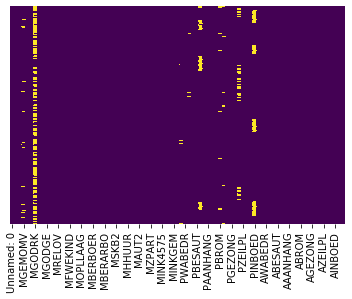

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.savefig("missing_values.png")

In [0]:
# We found Imbalanced Data in this dataset
df.groupby(['CARAVAN']).size().reset_index(name='counts')

,CARAVAN,counts
0,0,5474
1,1,348


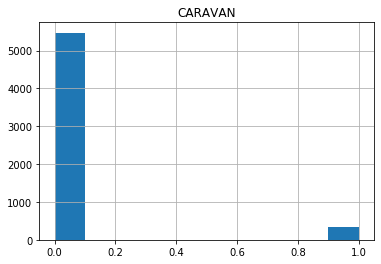

In [0]:
df.hist(column='CARAVAN')
plt.savefig("Imbalanced.png")

In [0]:
#Correlation between features 
df.corr()

,Unnamed: 0,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,MRELSA,MRELOV,MFALLEEN,MFGEKIND,MFWEKIND,MOPLHOOG,MOPLMIDD,MOPLLAAG,MBERHOOG,MBERZELF,MBERBOER,MBERMIDD,MBERARBG,MBERARBO,MSKA,MSKB1,MSKB2,MSKC,MSKD,MHHUUR,MHKOOP,MAUT1,MAUT2,MAUT0,MZFONDS,MZPART,MINKM30,MINK3045,MINK4575,...,PPERSAUT,PBESAUT,PMOTSCO,PVRAAUT,PAANHANG,PTRACTOR,PWERKT,PBROM,PLEVEN,PPERSONG,PGEZONG,PWAOREG,PBRAND,PZEILPL,PPLEZIER,PFIETS,PINBOED,PBYSTAND,AWAPART,AWABEDR,AWALAND,APERSAUT,ABESAUT,AMOTSCO,AVRAAUT,AAANHANG,ATRACTOR,AWERKT,ABROM,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
Unnamed: 0,1.000000,-0.008546,0.001353,-0.004340,0.008444,-0.009326,-0.022368,-0.005757,-0.007103,0.017066,-0.015274,-0.008759,0.014856,0.018554,-0.000120,-0.018468,0.009316,-0.001583,0.000108,0.009840,-0.001693,0.007662,0.007848,-0.003150,-0.008291,0.003065,0.019764,-0.010240,0.001799,-0.001917,0.008943,-0.008936,-0.010387,-0.013540,0.016403,0.009554,-0.009714,0.015563,-0.008806,-0.009310,...,0.014690,0.018827,-0.010563,0.014246,-0.002358,0.014568,0.008783,0.019168,0.015034,0.015586,-0.002303,0.001895,-0.044409,-0.000472,-0.016667,0.007617,-0.028752,-0.010325,-0.024398,0.015617,0.004480,0.016523,0.017377,0.002574,0.017434,-0.000147,0.017710,0.005159,0.023038,0.003180,0.008591,-0.003136,0.002039,-0.020063,-0.011013,-0.015283,0.008488,-0.019674,-0.012922,0.006181
MOSTYPE,-0.008546,1.000000,-0.038721,-0.049600,0.009454,0.992672,-0.110083,0.090399,-0.025642,-0.019505,-0.065596,-0.016270,0.086939,0.029240,-0.066250,0.023408,-0.473606,-0.278429,0.525678,-0.418615,-0.117736,0.248598,-0.206198,0.304749,0.273051,-0.392931,-0.188518,-0.038078,0.386104,0.204630,0.148998,-0.149988,-0.177830,0.037795,0.155497,0.351784,-0.352164,0.201531,0.161055,-0.255483,...,-0.008459,-0.027940,-0.003506,0.018422,0.031749,0.096665,0.032408,0.025760,-0.042563,0.028420,-0.015115,0.001364,-0.009592,0.014379,-0.018116,-0.012124,-0.018901,-0.059084,-0.032937,-0.004066,0.079674,-0.008274,-0.027822,-0.012530,0.018883,0.030461,0.092055,0.020123,0.032137,-0.028829,0.021707,-0.012060,-0.002909,-0.011512,0.007801,-0.018162,-0.015774,-0.021087,-0.053718,-0.069385
MAANTHUI,0.001353,-0.038721,1.000000,0.018092,0.056975,-0.045817,0.051789,-0.024360,0.012056,0.020540,0.023025,-0.038566,-0.012544,0.032535,-0.082919,0.042143,0.003419,-0.053171,0.036529,-0.005747,0.042438,-0.018175,0.005762,0.024802,-0.052345,-0.014437,0.009924,-0.025303,-0.007345,0.020671,-0.049127,0.048361,-0.011175,0.023661,-0.011086,-0.016135,0.015282,0.014721,-0.024334,0.015371,...,-0.026229,-0.019982,-0.016813,-0.010525,-0.010934,-0.030618,-0.008149,-0.013833,0.020195,0.008396,0.011338,-0.017093,0.002289,-0.005387,0.004391,-0.016890,0.008185,-0.003767,0.042531,0.004693,-0.027627,-0.029427,-0.018716,-0.019295,-0.009690,-0.010349,-0.027570,-0.006756,-0.013336,0.020926,0.003321,0.009444,-0.016333,0.000655,-0.006189,0.000666,-0.020993,0.018304,-0.004166,-0.009809
MGEMOMV,-0.004340,-0.049600,0.018092,1.000000,-0.368973,-0.016289,-0.037335,0.035006,-0.103539,0.001001,0.439958,-0.160186,-0.399707,-0.549099,-0.432446,0.751252,0.029514,0.060992,-0.069617,0.013964,0.002315,0.092922,0.026844,0.007514,-0.146564,0.038913,0.065733,0.061714,-0.047194,-0.180490,-0.270067,0.268533,0.171885,0.158988,-0.320338,-0.067962,0.068134,-0.311937,0.012743,0.227784,...,0.004789,-0.010081,0.023046,-0.005141,0.006127,0.050336,0.029129,0.017209,0.010960,0.000404,0.008929,0.012042,0.052850,0.006712,-0.006489,0.023747,0.005477,0.044498,-0.032677,0.033154,0.032741,0.002803,-0.013893,0.011977,-0.003728,0.007792,0.051472,0.024906,0.011517,0.005134,-0.003282,0.009042,0.013940,0.004422,0.007712,-0.008426,0.022231,0.018697,0.036954,0.024307
MGEMLEEF,0.008444,0.009454,0.056975,-0.368973,1.000000,0.003872,-0.078861,0.093654,0.057737,-0.119966,-0.040384,-0.307401,0.199774,0.236594,0.204225,-0.355754,-0.025792,-0.221676,0.178965,0.141389,0.058309,0.090716,-0.162686,-0.048103,0.034338,0.047820,-0.155802,-0.040360,-0.063

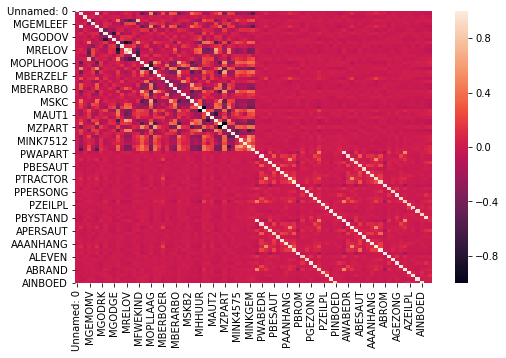

In [0]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
sns.heatmap(df.corr())
plt.savefig("Corr.png")

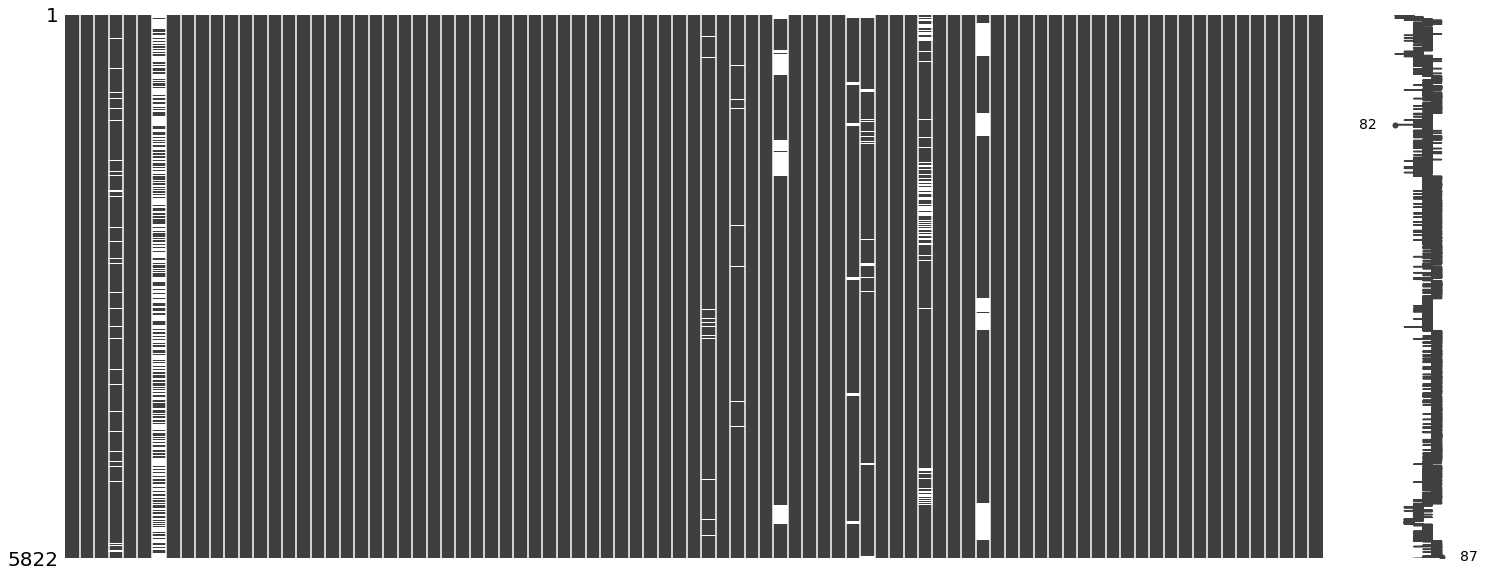

In [0]:
import missingno as msno
msno.matrix(df)
plt.savefig("missing_matrix.png")

In [0]:
#handling missing values
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = "NaN", 
                  strategy = "median", axis = 0)
imputer = imputer.fit(df.iloc[:,:-1])

df.iloc[:,:-1]= imputer.fit_transform(df.iloc[:,:-1])

print("\n\nNew Input with median Value for NaN : \n",df.head()) 

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)




New Input with median Value for NaN : 
    Unnamed: 0  MOSTYPE  MAANTHUI  MGEMOMV  ...  AFIETS  AINBOED  ABYSTAND  CARAVAN
0         0.0     33.0       1.0      3.0  ...     0.0      0.0       0.0        0
1         1.0     37.0       1.0      2.0  ...     0.0      0.0       0.0        0
2         2.0     37.0       1.0      2.0  ...     0.0      0.0       0.0        0
3         3.0      9.0       1.0      3.0  ...     0.0      0.0       0.0        0
4         4.0     40.0       1.0      4.0  ...     0.0      0.0       0.0        0

[5 rows x 87 columns]


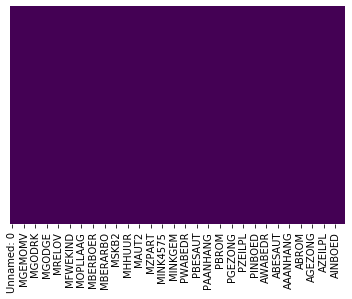

In [0]:
import seaborn as sns
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.savefig("non_misssning.png")

In [0]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]


#rough Model

# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.model_selection import train_test_split
# knnclassifier = KNeighborsClassifier(n_neighbors=3)
# X_train, X_test, y_train, y_test = train_test_split(X, y,
#                                  test_size=0.3, random_state=42)
# knnclassifier.fit(X_train, y_train)
# y_pred = knnclassifier.predict(X_test)
# knnclassifier.score(X_test, y_test)

0.9250143102461362

In [0]:
df2.shape

(5822, 87)

In [0]:
X = df[["MGEMLEEF","MRELGE","MSKC","ABYSTAND","CARAVAN"]]
print(X)

      MGEMLEEF  MRELGE  MSKC  ABYSTAND  CARAVAN
0            2       7     6         0        0
1            2       6     5         0        0
2            2       3     4         0        0
3            3       5     4         0        0
4            2       7     0         0        0
...        ...     ...   ...       ...      ...
5817         2       1     3         0        0
5818         4       6     0         0        0
5819         4       5     4         0        1
5820         2       7     5         0        0
5821         3       7     6         0        0

[5822 rows x 5 columns]


In [0]:
print(df[["MGEMOMV","MFWEKIND","CARAVAN"]].corr())

           MGEMOMV  MFWEKIND   CARAVAN
MGEMOMV   1.000000  0.655576  0.021738
MFWEKIND  0.655576  1.000000  0.032346
CARAVAN   0.021738  0.032346  1.000000


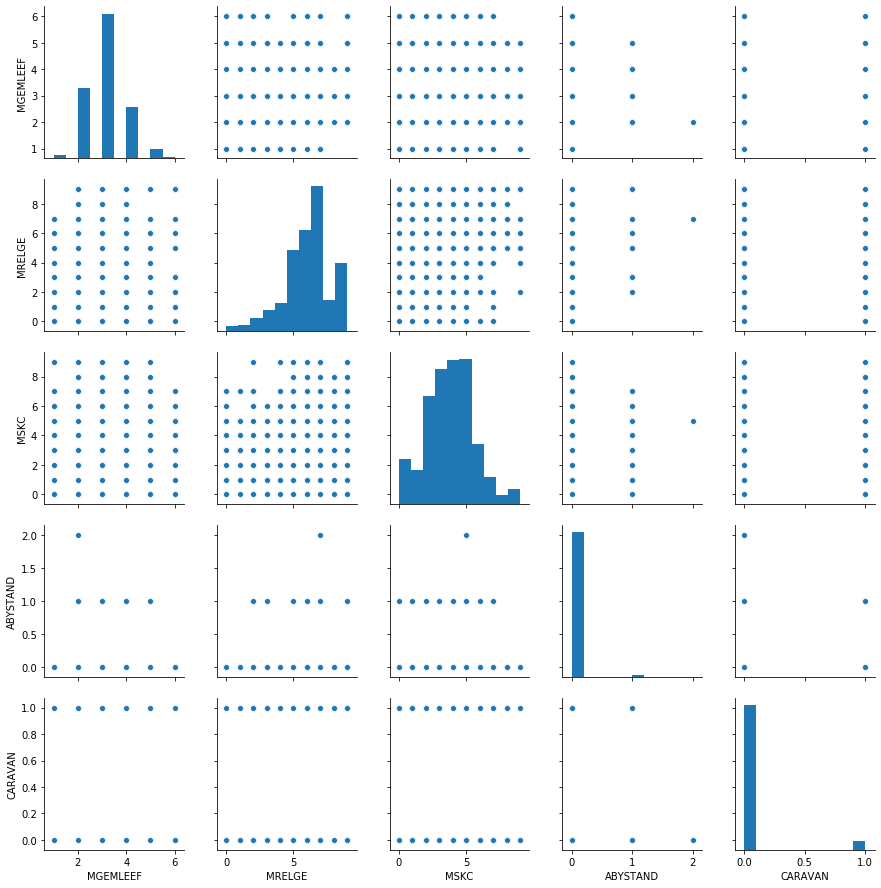

In [0]:
#distribution of some of the variables
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(X)
plt.savefig('pairplot.png')

In [0]:
import pandas_profiling as pf

#Generating Profiling to check co-linearity between predictors
pf.ProfileReport(df)

Output hidden; open in https://colab.research.google.com to view.

In [0]:
#removing Columns which are having colinearity greaterthan .90

df = df.drop(["MGEMOMV"],axis=1)

df.shape

(5822, 70)

In [0]:
df.columns

Index(['Unnamed: 0', 'MOSTYPE', 'MAANTHUI', 'MGEMLEEF', 'MGODRK', 'MGODPR',
       'MGODOV', 'MGODGE', 'MRELGE', 'MRELSA', 'MRELOV', 'MFALLEEN',
       'MFGEKIND', 'MFWEKIND', 'MOPLHOOG', 'MOPLMIDD', 'MOPLLAAG', 'MBERHOOG',
       'MBERZELF', 'MBERBOER', 'MBERMIDD', 'MBERARBG', 'MBERARBO', 'MSKA',
       'MSKB1', 'MSKB2', 'MSKC', 'MSKD', 'MHHUUR', 'MHKOOP', 'MAUT1', 'MAUT2',
       'MAUT0', 'MZFONDS', 'MZPART', 'MINKM30', 'MINK3045', 'MINK4575',
       'MINK7512', 'MINK123M', 'MINKGEM', 'MKOOPKLA', 'PWAPART', 'PWABEDR',
       'PWALAND', 'PPERSAUT', 'PBESAUT', 'PMOTSCO', 'PVRAAUT', 'PAANHANG',
       'PTRACTOR', 'PWERKT', 'PBROM', 'PLEVEN', 'PPERSONG', 'PGEZONG',
       'PWAOREG', 'PBRAND', 'PZEILPL', 'PPLEZIER', 'PFIETS', 'PINBOED',
       'PBYSTAND', 'AWABEDR', 'ALEVEN', 'APERSONG', 'ABRAND', 'AZEILPL',
       'AINBOED', 'CARAVAN'],
      dtype='object')

In [0]:
# def vif_cal(input_data,dependent_col):
#   import statsmodels.formula.api as sm
#   x_vars = input_data.drop([dependent_col],axis = 1)
#   xvar_names = x_vars.columns
#   for i in range(0,xvar_names.shape[0]):
#     y=x_vars[xvar_names[i]]
#     x=x_vars[xvar_names.drop(xvar_names[i])]
#     rsq = sm.ols(formula="y~x",data=x_vars).fit().rsquared
#     vif = round(1/(1-rsq),2)
#     method=list()
#     if vif<5:
#        print(xvar_names[i],"VIF = ", vif)
#        #print(xvar_names[i])
#     else:
#     #  method.extend(xvar_names[i])
#       print(xvar_names[i])
        

In [0]:
#vif_cal(input_data=df,dependent_col="CARAVAN")

Unnamed: 0 VIF =  1.01
MOSTYPE VIF =  2.04
MAANTHUI VIF =  1.06
MGEMOMV VIF =  2.04
MGEMLEEF VIF =  1.8
MGODRK VIF =  3.63
MGODPR
MGODOV VIF =  3.98
MGODGE
MRELGE
MRELSA
MRELOV
MFALLEEN
MFGEKIND
MFWEKIND
MOPLHOOG
MOPLMIDD
MOPLLAAG
MBERHOOG
MBERZELF VIF =  1.79
MBERBOER VIF =  3.08
MBERMIDD
MBERARBG
MBERARBO
MSKA
MSKB1 VIF =  4.88
MSKB2
MSKC
MSKD VIF =  4.13
MHHUUR
MHKOOP
MAUT1
MAUT2
MAUT0
MZFONDS
MZPART
MINKM30
MINK3045
MINK4575
MINK7512 VIF =  4.1
MINK123M VIF =  1.58
MINKGEM VIF =  3.97
MKOOPKLA VIF =  2.23
PWAPART VIF =  1.54
PWABEDR
PWALAND VIF =  1.58
PPERSAUT VIF =  1.12
PBESAUT VIF =  1.21
PMOTSCO VIF =  1.02
PVRAAUT VIF =  1.09
PAANHANG VIF =  1.08
PTRACTOR VIF =  1.62
PWERKT VIF =  1.17
PBROM VIF =  1.09
PLEVEN VIF =  3.41
PPERSONG
PGEZONG VIF =  1.05
PWAOREG VIF =  1.06
PBRAND VIF =  2.95
PZEILPL VIF =  4.27
PPLEZIER VIF =  1.06
PFIETS VIF =  1.02
PINBOED VIF =  4.35
PBYSTAND VIF =  1.04
AWABEDR
ALEVEN VIF =  3.41
APERSONG
ABRAND VIF =  2.98
AZEILPL VIF =  4.39
AINBOED VIF = 

In [0]:
# df = df.drop(["MGODPR","MGODGE","MRELGE","MRELGE","MRELOV","MFALLEEN","MFGEKIND","MOPLHOOG","MOPLMIDD","MOPLLAAG","MBERHOOG","MBERMIDD","MBERARBG",
#               "MBERARBO","MSKA","MSKB2","MSKC","MHHUUR","MHKOOP","MAUT1","MAUT2","MAUT0","MZFONDS","MZFONDS","MHHUUR","MZPART","MINKM30","MINK3045","MINK4575",
#               "PWABEDR","PPERSONG","AWABEDR"],axis=1)


In [0]:
df.columns

Index(['Unnamed: 0', 'MOSTYPE', 'MAANTHUI', 'MGEMOMV', 'MGEMLEEF', 'MGODRK',
       'MGODOV', 'MRELSA', 'MFWEKIND', 'MBERZELF', 'MBERBOER', 'MSKB1', 'MSKD',
       'MINK7512', 'MINK123M', 'MINKGEM', 'MKOOPKLA', 'PWAPART', 'PWALAND',
       'PPERSAUT', 'PBESAUT', 'PMOTSCO', 'PVRAAUT', 'PAANHANG', 'PTRACTOR',
       'PWERKT', 'PBROM', 'PLEVEN', 'PGEZONG', 'PWAOREG', 'PBRAND', 'PZEILPL',
       'PPLEZIER', 'PFIETS', 'PINBOED', 'PBYSTAND', 'ALEVEN', 'APERSONG',
       'ABRAND', 'AZEILPL', 'AINBOED', 'CARAVAN'],
      dtype='object')

In [0]:
y=df['CARAVAN']
X=df.drop('CARAVAN',axis=1)


# #rough Model
# #with KNeighborsClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.model_selection import train_test_split
# knnclassifier = KNeighborsClassifier(n_neighbors=3)
# X_train, X_test, y_train, y_test = train_test_split(X1, y1,
#                                  test_size=0.3, random_state=42)

# knnclassifier.fit(X_train, y_train)
# y_pred = knnclassifier.predict(X_test)
# knnclassifier.score(X_test, y_test)

In [0]:
#With LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                 test_size=0.3, random_state=42)
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# from xgboost import XGBClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score
# X_train, X_test, y_train, y_test = train_test_split(X, y,
#                                  test_size=0.3, random_state=42)

# model = XGBClassifier()
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)

# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 93.13%


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
# from xgboost import XGBClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score


# model = XGBClassifier()
# model.fit(X_train[['MGODRK']], y_train)
# y_pred = model.predict(X_test[['MGODRK']])

# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 93.19%


Confusion matrix:
 [[1628    0]
 [ 119    0]]


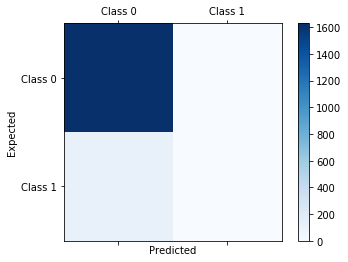

In [0]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [0]:
#Balancing Dataset

Buy = df[df['CARAVAN']==1]

NotBuy = df[df['CARAVAN']==0]

print(Buy.shape,NotBuy.shape)


#Handle-Imbalanced-Dataset

from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss
smk = SMOTETomek(random_state=42)
X_res,y_res=smk.fit_sample(X,y)

X_res.shape,y_res.shape

(348, 70) (5474, 70)


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


((10894, 69), (10894,))

In [0]:
#Over Sampling for tarining
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

# Imbalanced DataSet Handle by Under Sampling
# from imblearn.under_sampling import NearMiss
# nm = NearMiss(random_state=42)
# X_res,y_res=nm.fit_sample(X1,y1)

Original dataset shape Counter({0: 5474, 1: 348})
Resampled dataset shape Counter({0: 5447, 1: 5447})


In [0]:
#Cross validation logistic regression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
y_res_pred = cross_val_score(logreg, X_res,y_res, cv=20, scoring = 'accuracy').mean()
print(y_res_pred)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

0.7282960299504418


In [0]:
import numpy as np
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 


In [0]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96      1746
           1       0.00      0.00      0.00         1

    accuracy                           0.93      1747
   macro avg       0.50      0.47      0.48      1747
weighted avg       1.00      0.93      0.96      1747

